In [1]:
%matplotlib inline
import numpy as np
import pprint as pp
import random
from datetime import datetime
from itertools import combinations
import string
import pandas
from collections import Counter

Reading in the secret message

In [2]:
with open ("encyrption.txt", "r") as myfile:
    message=myfile.read().replace('\n', '')

pairFreq = np.loadtxt('pairFreq.dat')

pp.pprint(message)

'BIU V DICT ZMEF VBZFU MZ NVJ OJGFUFL MCZI ZGMJ NIUDL IB JIUUIN VCL ZUIOQDF QK ZGF HVUMJG JOUTFIC MZ UFEVMCFL V EVZZFU IB PICJMLFUVQDF LIOQZ NGFZGFU ZGF PGMDL NIODL JOURMRF ZI QFVU VCK CVEF VZ VDD MC NGMPG PVJF MZ MJ JIEFNGVZ EIUF ZGVC HUIQVQDF ZGVZ ZGFJF EFEIMUJ NIODL CFRFU GVRF VHHFVUFL IU MB ZGFK GVL ZGVZ QFMCT PIEHUMJFL NMZGMC V PIOHDF IB HVTFJ ZGFK NIODL GVRF HIJJFJJFL ZGF MCFJZMEVQDF EFUMZ IB QFMCT ZGF EIJZ PICPMJF VCL BVMZGBOD JHFPMEFC IB QMITUVHGK FYZVCZ MC ZGF DMZFUVZOUF IB VCK VTF IU PIOCZUK '


Reading in the pair frequence matrix

In [3]:
pairFreq = np.loadtxt('pairFreq.dat')
pairFreq.shape

(27, 27)

## Useful Functions:

In [4]:
def get_map():
    alphabet = string.uppercase
    key = ''.join(random.sample(alphabet,len(alphabet)))
    myMap = dict(zip(alphabet, key))
    myMap[' '] = ' '
    return myMap

def key_swap(myMap, swap_pick):
    swapMap = dict(myMap)
    swapMap[swap_pick[0]] = myMap[swap_pick[1]]
    swapMap[swap_pick[1]] = myMap[swap_pick[0]]
    return swapMap

def rate_string(M, s):
    lookup = string.uppercase + ' '
    return np.sum(M[lookup.find(s[i])][lookup.find(s[i+1])] for i in range(len(s) - 1))

def encrypt(s, myMap):
    return ''.join([myMap[c] for c in list(s)])

def MC_decrypt(oldS, M, myMap, nsteps = 1000):
    
    allSwaps = [''.join(i) for i in combinations(string.uppercase, 2)]
    p = rate_string(pairFreq, oldS)
    newp = 0.0
    oldmap = dict(myMap)
    t = 0
    t0 = datetime.now()
    for i in range(nsteps):
        mySwap = allSwaps[random.randint(0,len(allSwaps)-1)]
        newmap = dict(key_swap(oldmap, mySwap))
        newS = encrypt(oldS, newmap)
        newp = rate_string(pairFreq, newS)
        if(p < newp):
            oldmap = dict(newmap)
            p = newp
            t += 1

    t1 = datetime.now()
    tdiff = t1-t0

    #print "Total run time: " + str(tdiff)[2:10] + "s"
    #print "p = " + str(p)
    #print "Acceptance Ratio = " + str(100*float(t)/float(nsteps)) + '%'
    return encrypt(oldS, oldmap)

First lets pick a random mapping to get started

In [5]:
myMap = get_map()
pp.pprint(myMap)

{' ': ' ',
 'A': 'L',
 'B': 'R',
 'C': 'W',
 'D': 'A',
 'E': 'V',
 'F': 'P',
 'G': 'G',
 'H': 'K',
 'I': 'N',
 'J': 'Q',
 'K': 'F',
 'L': 'J',
 'M': 'E',
 'N': 'S',
 'O': 'U',
 'P': 'B',
 'Q': 'T',
 'R': 'O',
 'S': 'M',
 'T': 'Z',
 'U': 'X',
 'V': 'H',
 'W': 'Y',
 'X': 'I',
 'Y': 'C',
 'Z': 'D'}


Now lets run our simulation to see what we get

In [6]:
MC_decrypt(message, pairFreq, myMap)

'FOR A NOMC TILE AFTER IT WAS USHERED IMTO THIS WORND OF SORROW AMD TROUPNE PY THE GARISH SURCEOM IT RELAIMED A LATTER OF BOMSIDERAPNE DOUPT WHETHER THE BHIND WOUND SURVIVE TO PEAR AMY MALE AT ANN IM WHIBH BASE IT IS SOLEWHAT LORE THAM GROPAPNE THAT THESE LELOIRS WOUND MEVER HAVE AGGEARED OR IF THEY HAD THAT PEIMC BOLGRISED WITHIM A BOUGNE OF GACES THEY WOUND HAVE GOSSESSED THE IMESTILAPNE LERIT OF PEIMC THE LOST BOMBISE AMD FAITHFUN SGEBILEM OF PIOCRAGHY EXTAMT IM THE NITERATURE OF AMY ACE OR BOUMTRY '

If we run the same simulation again we might get different output

In [7]:
MC_decrypt(message, pairFreq, myMap)

'FOR A LONV TIBE AFTER IT WAS USHERED INTO THIS WORLD OF SORROW AND TROUMLE MY THE GARISH SURVEON IT REBAINED A BATTER OF CONSIDERAMLE DOUMT WHETHER THE CHILD WOULD SURPIPE TO MEAR ANY NABE AT ALL IN WHICH CASE IT IS SOBEWHAT BORE THAN GROMAMLE THAT THESE BEBOIRS WOULD NEPER HAPE AGGEARED OR IF THEY HAD THAT MEINV COBGRISED WITHIN A COUGLE OF GAVES THEY WOULD HAPE GOSSESSED THE INESTIBAMLE BERIT OF MEINV THE BOST CONCISE AND FAITHFUL SGECIBEN OF MIOVRAGHY EKTANT IN THE LITERATURE OF ANY AVE OR COUNTRY '

We could try to increas the number of steps but we might still be stuck in a local maxium of `p`. Lets run the decryption multiple times to see if there is a most common output

In [8]:
multi_run = np.array([list(MC_decrypt(message, pairFreq, myMap)) for i in range(10)])

we will need to transpose the output so that each row represents all of the outputs for a given charater of our message

In [9]:
letter_cols = np.transpose(multi_run)

Now we can find the mode of each charater position to find the final expected output

In [10]:
''.join( c for c in [Counter(letter_cols[x]).most_common(1)[0][0] for x in range(len(letter_cols))])

'FOR A LONG TIME AFTER IT WAS USHERED INTO THIS WORLD OF SORROW AND TROUBLE BY THE PARISH SURGEON IT REMAINED A MATTER OF CONSIDERABLE DOUBT WHETHER THE CHILD WOULD SURVIVE TO BEAR ANY NAME AT ALL IN WHICH CASE IT IS SOMEWHAT MORE THAN PROBABLE THAT THESE MEMOIRS WOULD NEVER HAVE APPEARED OR IF THEY HAD THAT BEING COMPRISED WITHIN A COUPLE OF PAGES THEY WOULD HAVE POSSESSED THE INESTIMABLE MERIT OF BEING THE MOST CONCISE AND FAITHFUL SPECIMEN OF BIOGRAPHY EXTANT IN THE LITERATURE OF ANY AGE OR COUNTRY '

With this method we can avoid relaying on a single decryption that may have been stuck in a local maximum `p` value. The short relativly short single decryption time allows for multiple runs to be used to build the most common result.

## Other Stuff

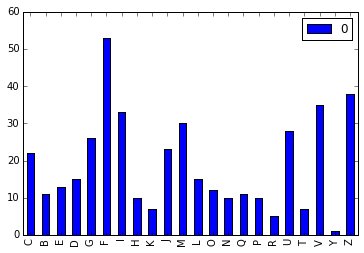

In [11]:
nospaces = ''.join([x for x in message.split()])
letter_counts = Counter(sorted(nospaces))
df = pandas.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar')